# Imports

In [1]:
from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
from PIL import ImageEnhance
import numpy as np

# Actual Stuff

In [2]:
class Picture:

    def __init__(self, path):
        self.img = Image.open(path)
        self.path = path
        self.original_image = self.img
        self._editing_threads = [[self.img]]
        self._thread_index = 0
        self._interthread_index = 0

    def show_cur_thread(self):
        fig, axs = plt.subplots(1, len(self._editing_threads[self._thread_index]),
                                figsize=(20, 20))
        for i in range(len(self._editing_threads[self._thread_index])):
            axs[i].axis('off')
            axs[i].imshow(self._editing_threads[self._thread_index][i])

    def show_all_threads(self):
        for i in range(len(self._editing_threads)):
            for image in self._editing_threads[self._thread_index]:
                plt.figure()
                plt.axis('off')
                plt.imshow(image)

    def show(self):
        plt.figure()
        plt.axis('off')
        plt.imshow(self.img)

    def __str__(self):
        return f'Image found at {self.path} (Use .show() to see image)'

    def forward(self):
        if(self._interthread_index+1 >= len(self._editing_threads[self._thread_index])):
            self.show()
            raise IndexError("Error: No next image; End of current thread")
        else:
            self._interthread_index += 1
            self.img = self._editing_threads[self._thread_index][self._interthread_index]
        self.show()

    def back(self):
        if(self._interthread_index-1 < 0):
            self.show()
            raise IndexError("Error: No previous image")
        else:
            self._interthread_index -= 1
            self.img = self._editing_threads[self._thread_index][self._interthread_index]
        self.show()

    def amplify_edges(self):
        self.img = self.img.filter(ImageFilter.EDGE_ENHANCE)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def blur(self):
        self.img = self.img.filter(ImageFilter.BLUR)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def smooth(self):
        self.img = self.img.filter(ImageFilter.SMOOTH)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def increase_color(self, color=1.5):
        self.img = ImageEnhance.Color(self.img).enhance(color)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def increase_contrast(self, contrast=1.4):
        self.img = ImageEnhance.Contrast(self.img).enhance(contrast)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def sharpen(self, sharpen=3):
        self.img = ImageEnhance.Sharpness(self.img).enhance(sharpen)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def brighten(self, brighten=1.1):
        self.img = ImageEnhance.Brightness(self.img).enhance(brighten)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def darken(self, darken=0.9):
        self.img = ImageEnhance.Brightness(self.img).enhance(darken)
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def random_edits(self):
        self.img = self.original_image
        self.brighten(np.random.normal(1, 0.1))
        self.sharpen()
        self.increase_color(np.random.normal(1.5, 0.2))
        self.increase_contrast(np.random.normal(1.4, 0.25))
        if(np.random.randint(4) == 0):
            self.amplify_edges()
        if(np.random.randint(10) == 0):
            self.blur()
        if(np.random.randint(4) == 0):
            self.smooth()
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

    def auto_enhance(self):
        self.img = self.original_image
        self.brighten()
        self.sharpen()
        self.increase_color()
        if(np.random.randint(4) == 0):
            self.amplify_edges()
        if(np.random.randint(10) == 0):
            self.blur()
        if(np.random.randint(4) == 0):
            self.smooth()
        self._editing_threads[self._thread_index].append(self.img)
        self._interthread_index += 1

In [3]:
image_local_path = '/Users/alexbradshaw/Desktop/Enhance/trini flag closer.JPG'

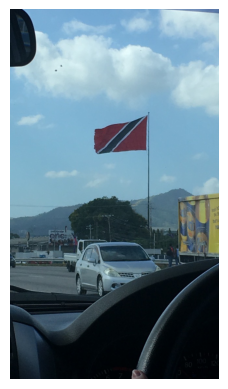

In [4]:
pic = Picture(image_local_path)
pic.show()

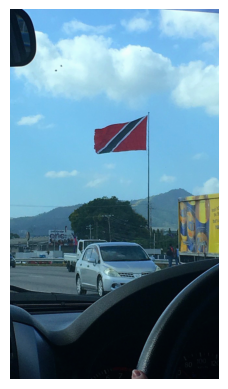

In [5]:
pic.random_edits()
pic.show()

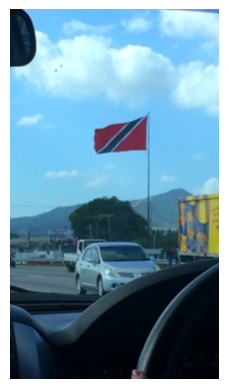

In [6]:
pic.auto_enhance()
pic.show()

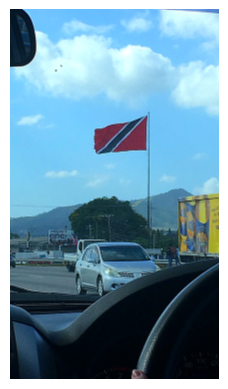

In [7]:
pic.amplify_edges()
pic.show()

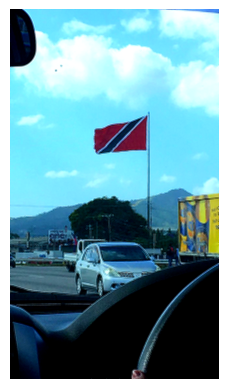

In [8]:
pic.increase_contrast()
pic.show()

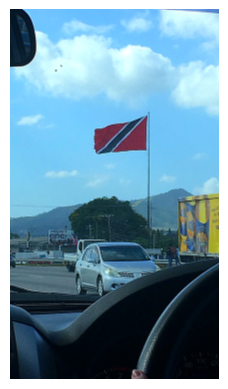

In [9]:
pic.back()

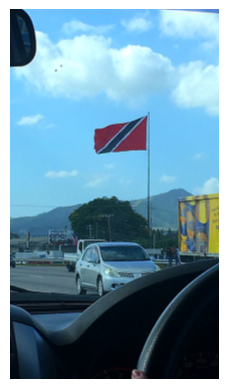

In [10]:
pic.smooth()
pic.show()

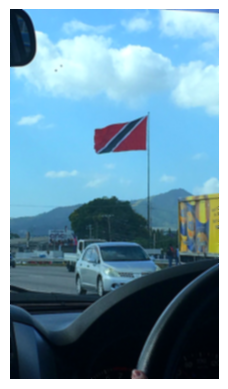

In [11]:
pic.blur()
pic.show()

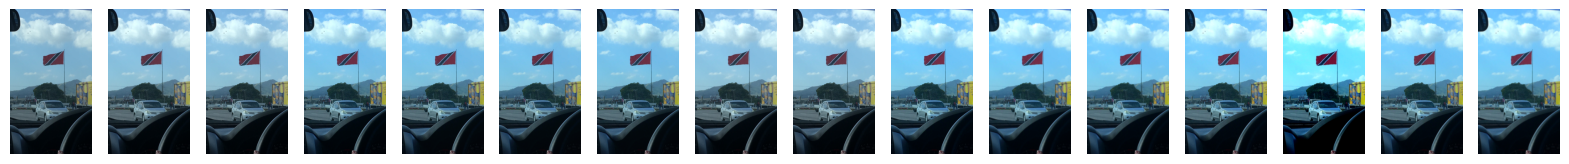

In [12]:
pic.show_cur_thread()

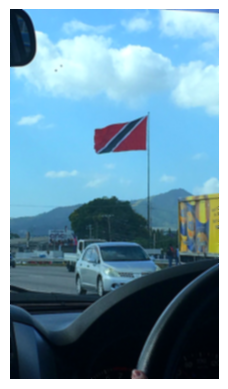

In [13]:
pic.forward()

IndexError: Error: No next image; End of current thread

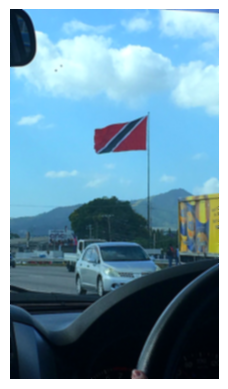

In [14]:
pic.forward()